# INTRODUCTION

Hi, this kernel will try to find what are the most important features when it come to Employee Attrition.

To be able to do so, I will perform a RandomForestClassifier before building a bar plot of the features importance. 

# IMPORTING MODULES

In [54]:
#Basic module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preparation module
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

#Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# DATA EXPLORATION

In [8]:
df= pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#numerical variables summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
#Check for null values in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Null model

This null model tell us that if we had to random guess if an employee will leave or not, we will be right 83.87% of the  time. We will compare this results with the prediction from our model.

In [12]:
#return the random guess if we had to predict if and employee will leave or not
random_guess = 1-len(df[df['Attrition']=='Yes'])/df.shape[0]
random_guess

0.8387755102040817

#### EDA takeaways

* the dataset has 1470 observation and 35 features. The small number of row could be problematic.
* There are 26 features of type integers and 9 of type Object.
* The dataset has no missing data.
* The model should be higher then 83% if we want it to be good or accepteble.


# VISUALISATION

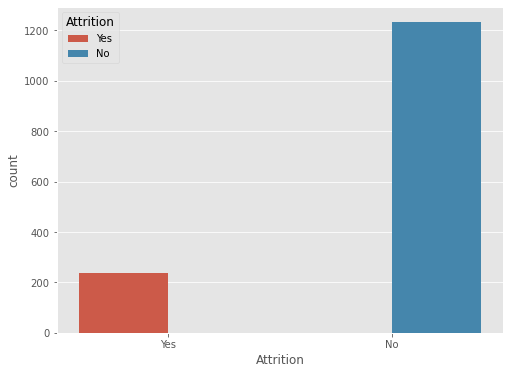

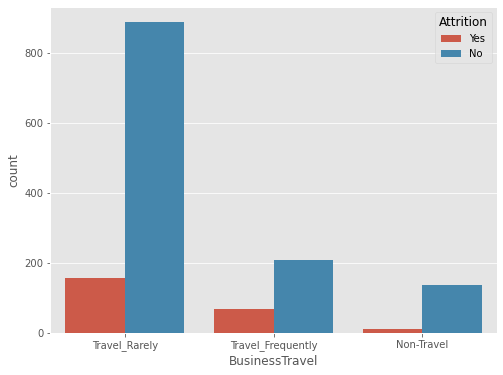

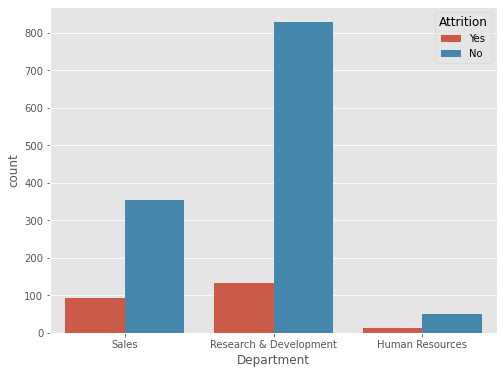

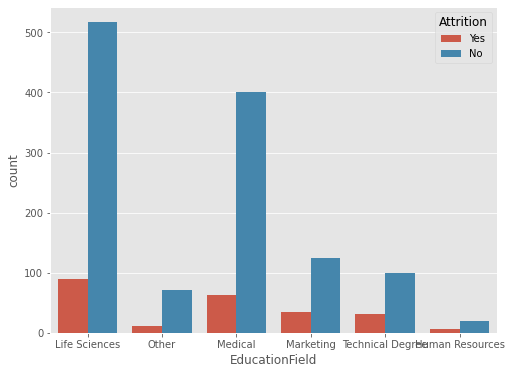

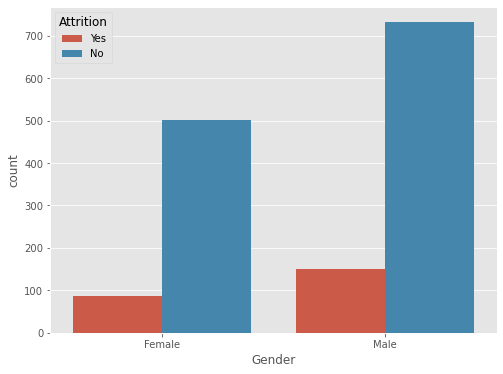

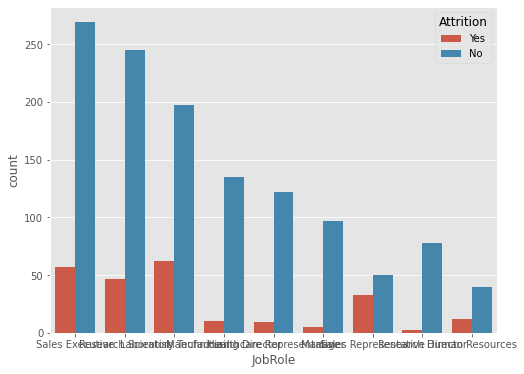

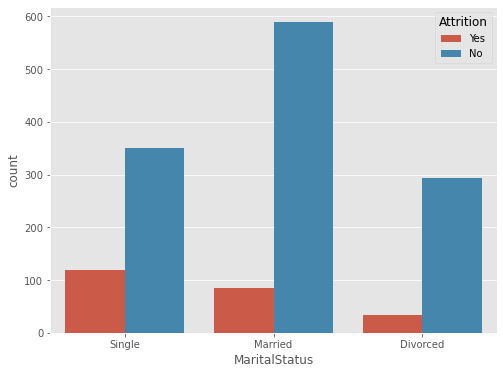

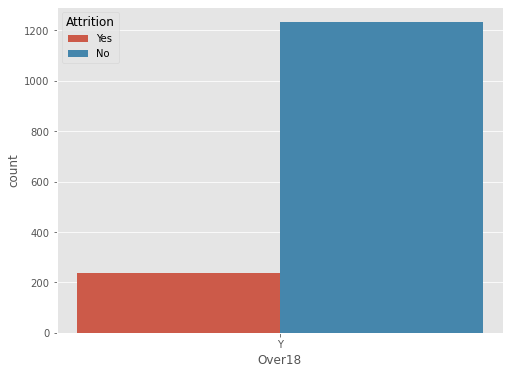

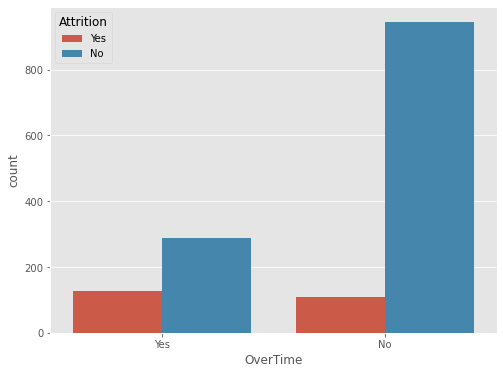

In [19]:
#plot the object features #
plt.style.use('ggplot')
#Create a loop that print all categorical variable against the attrition variable
for col in df.select_dtypes('object'):
    plt.figure(figsize=(8,6))
    sns.countplot(x=col,hue='Attrition',data=df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

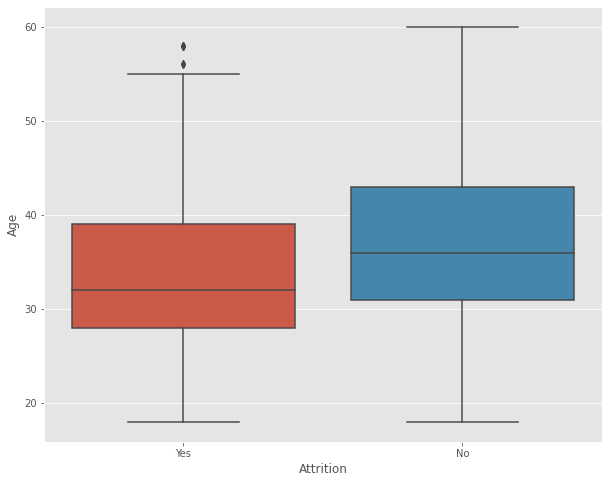

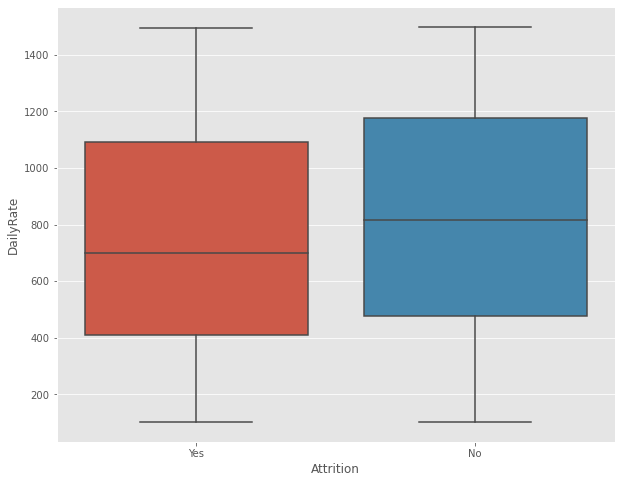

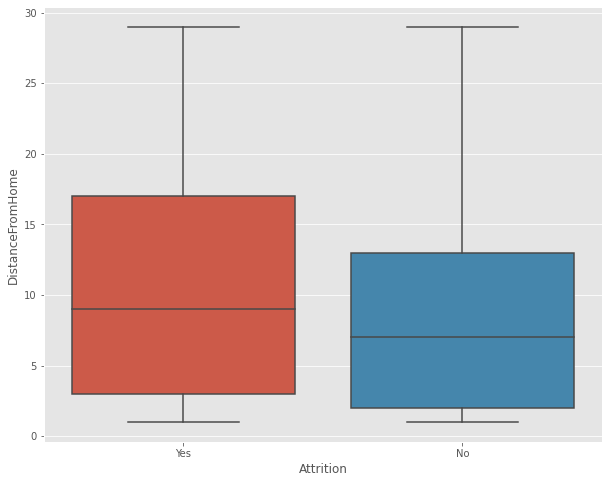

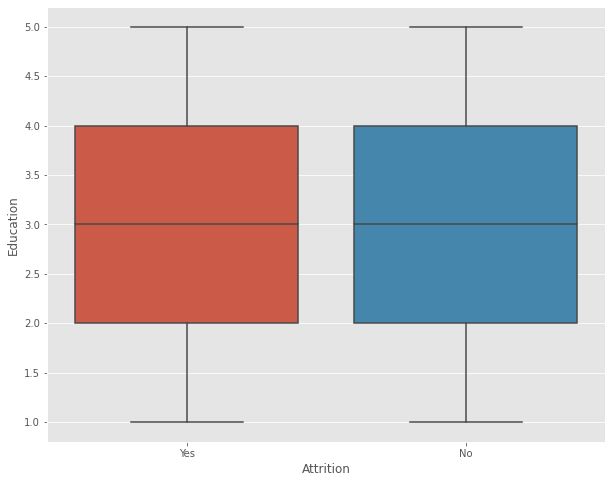

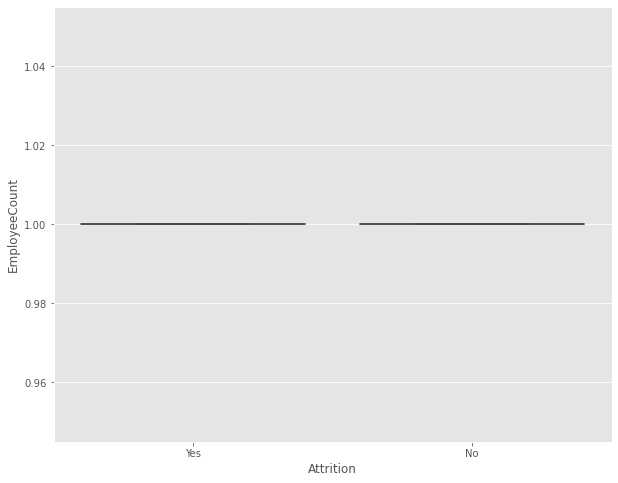

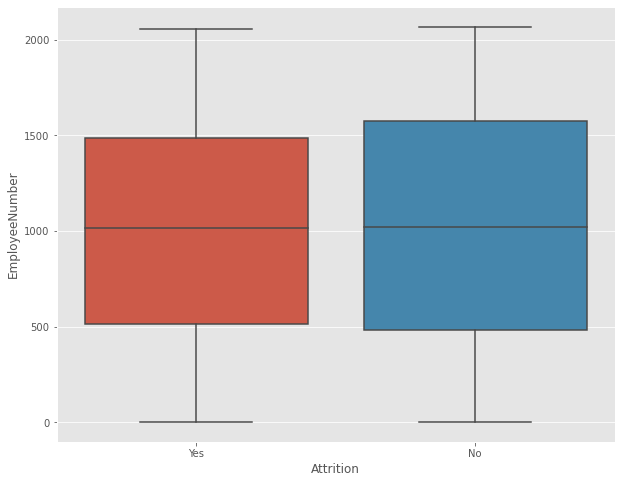

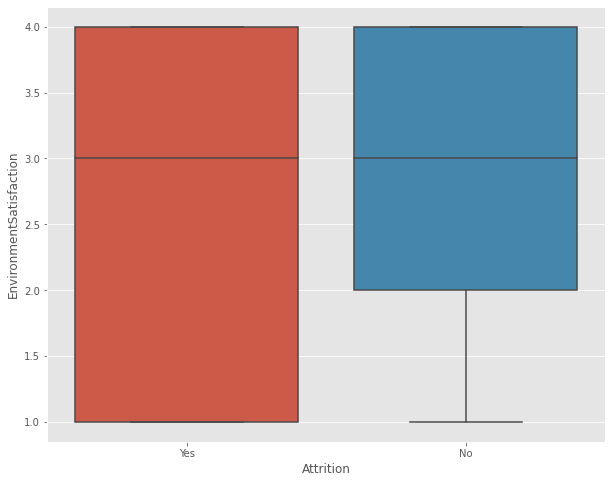

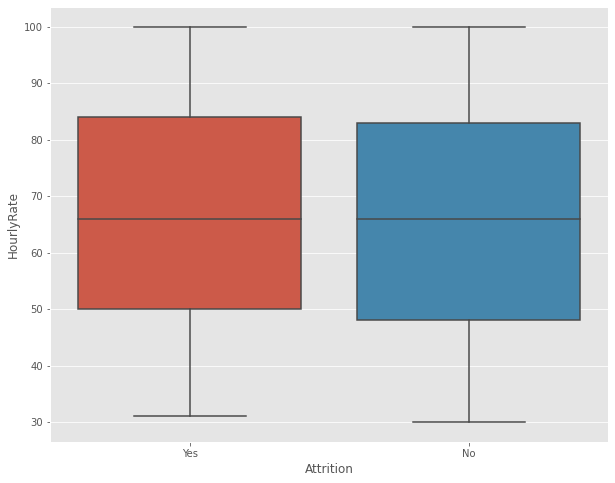

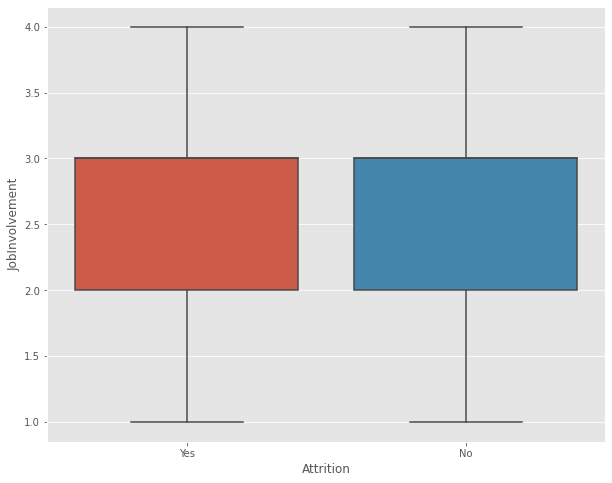

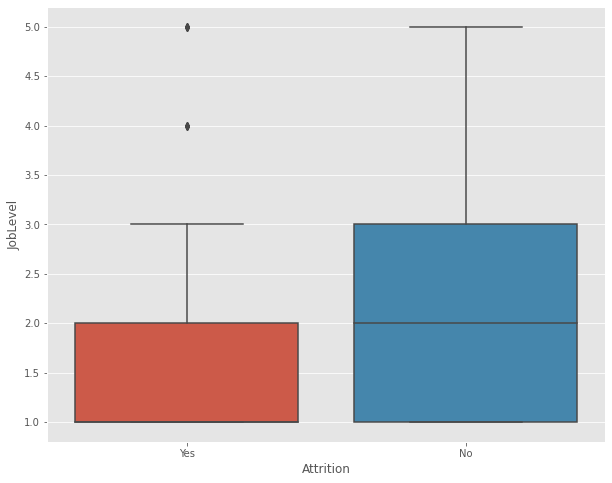

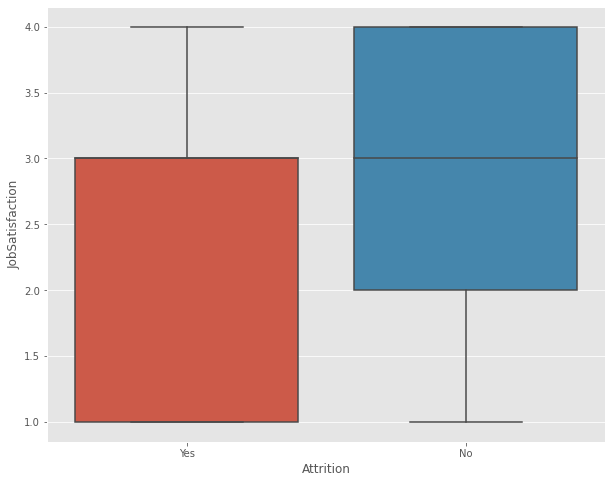

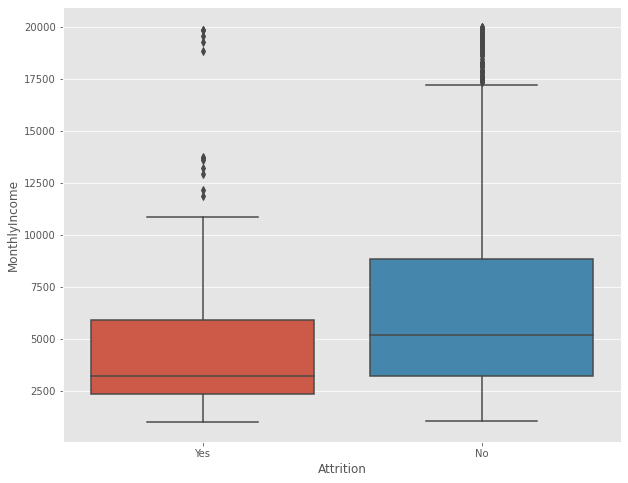

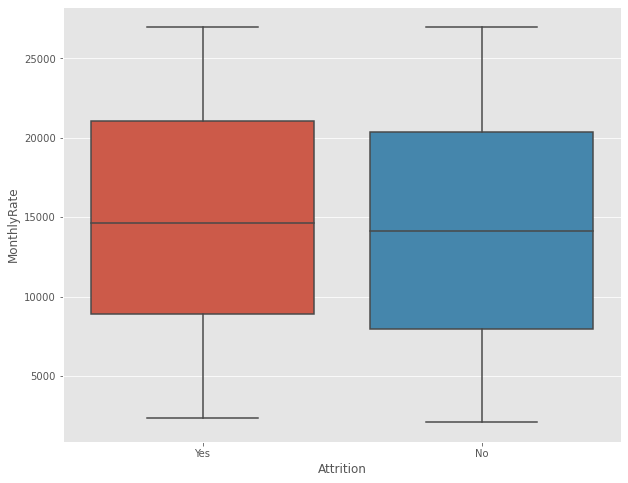

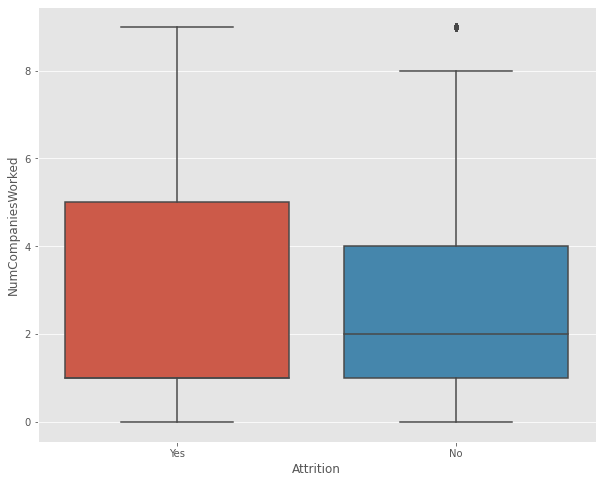

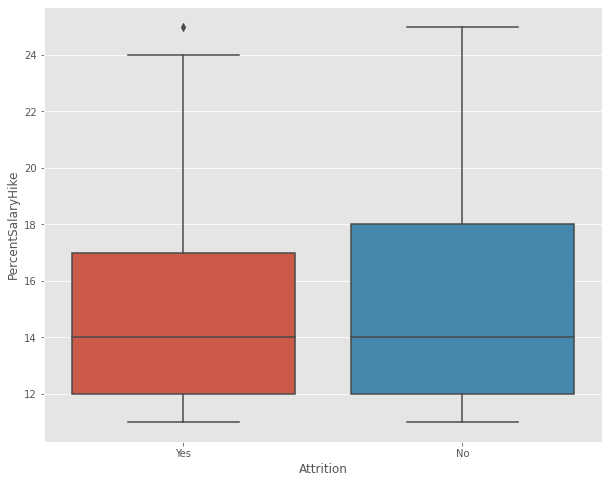

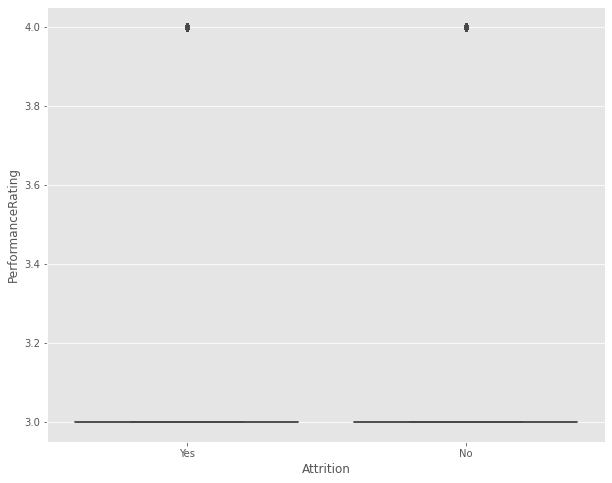

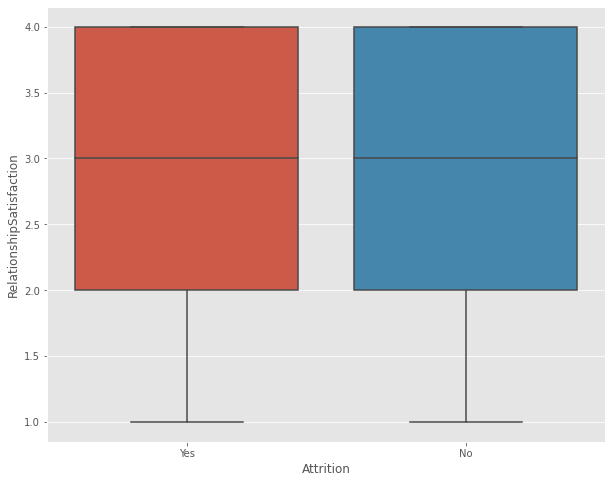

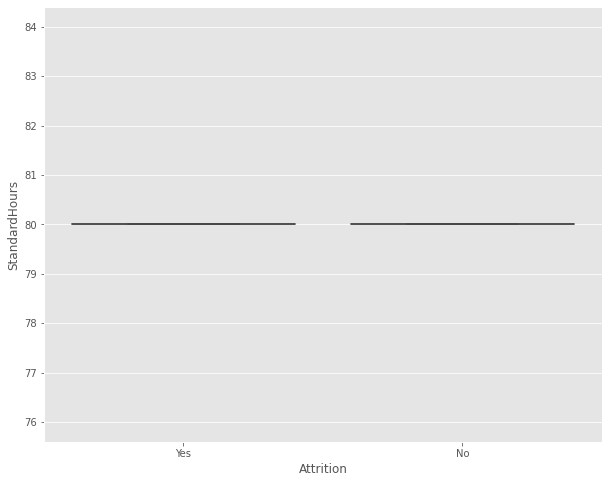

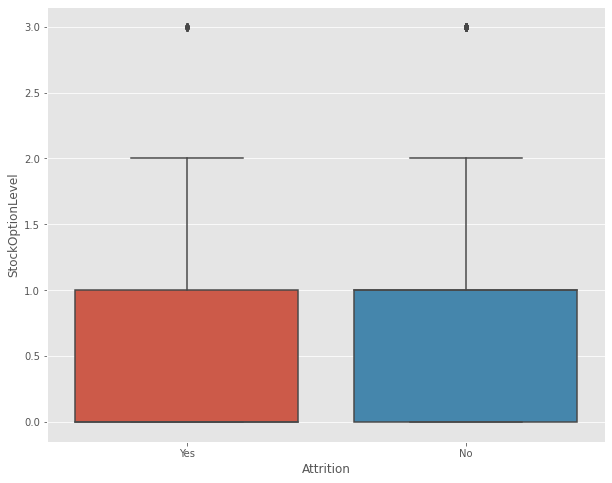

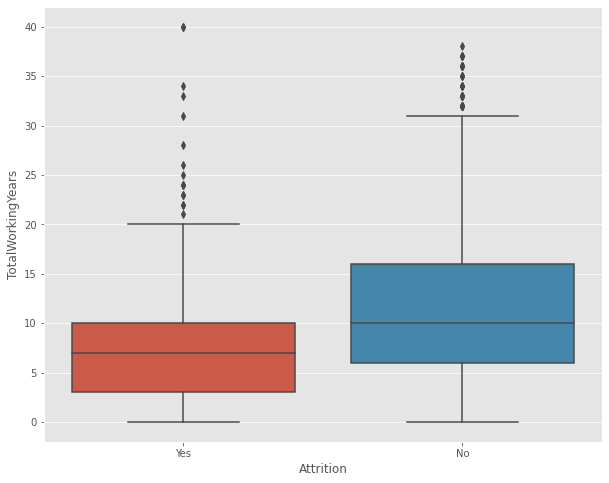

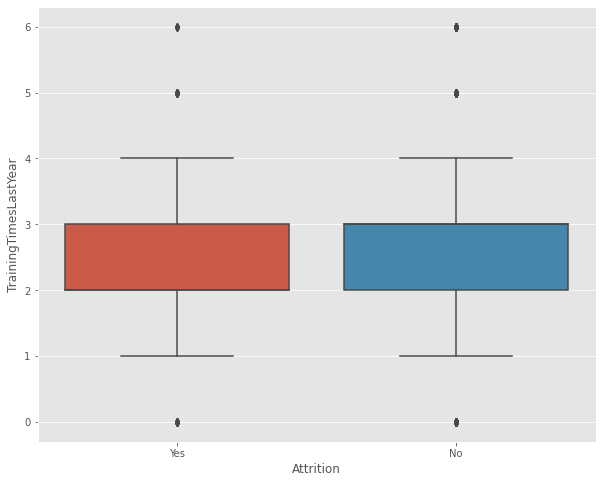

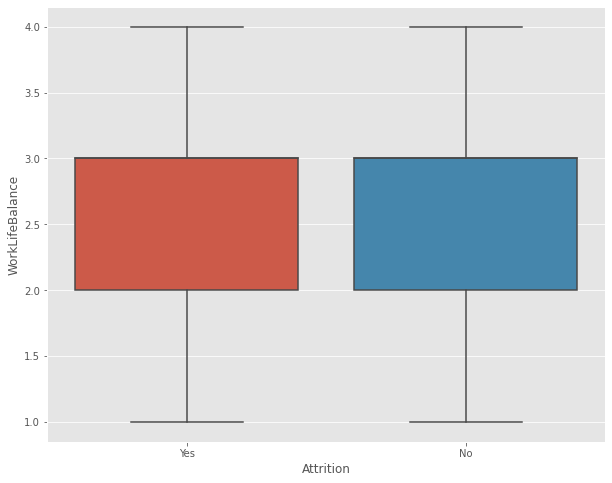

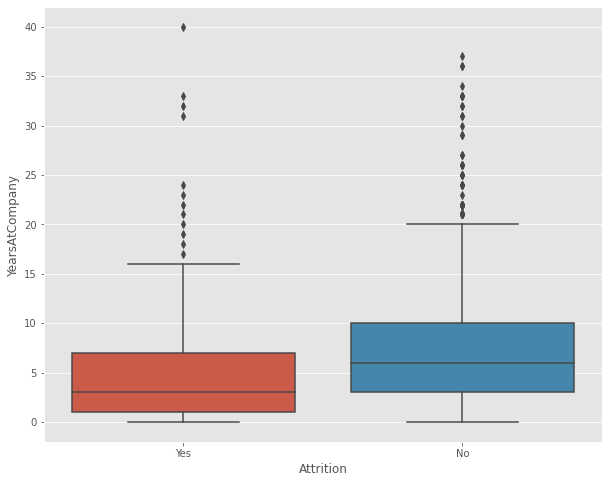

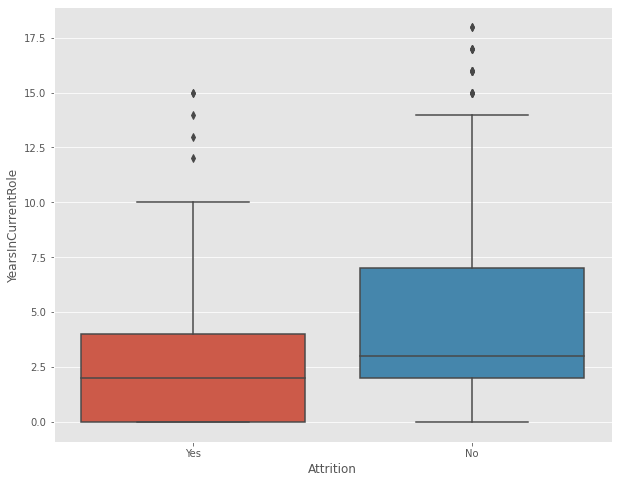

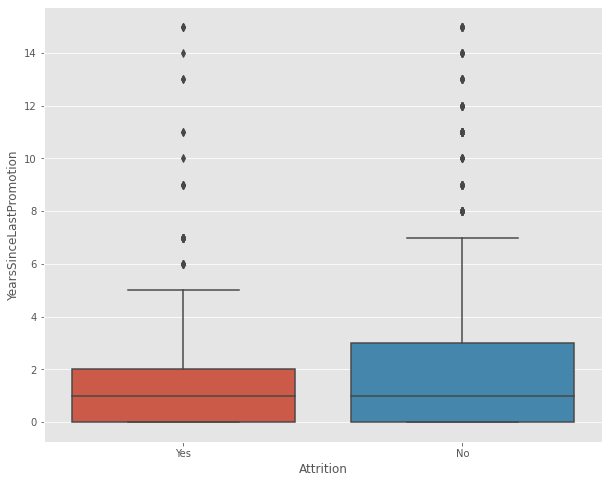

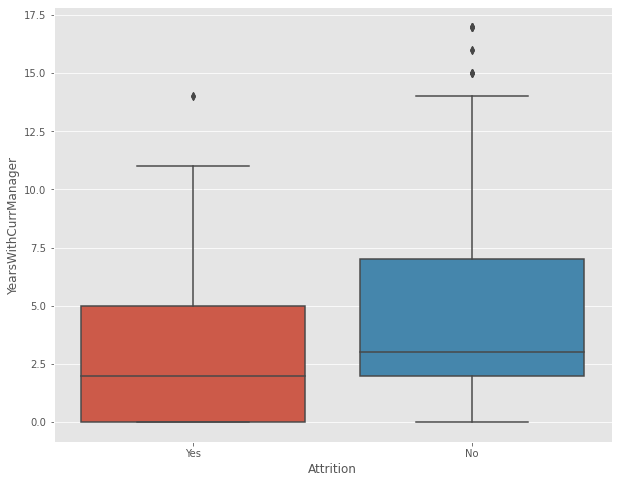

In [20]:
#plot the int features 
for col in df.select_dtypes('int64'):
    plt.figure(figsize=(10,8))
    sns.boxplot(x='Attrition', y=col,data=df)

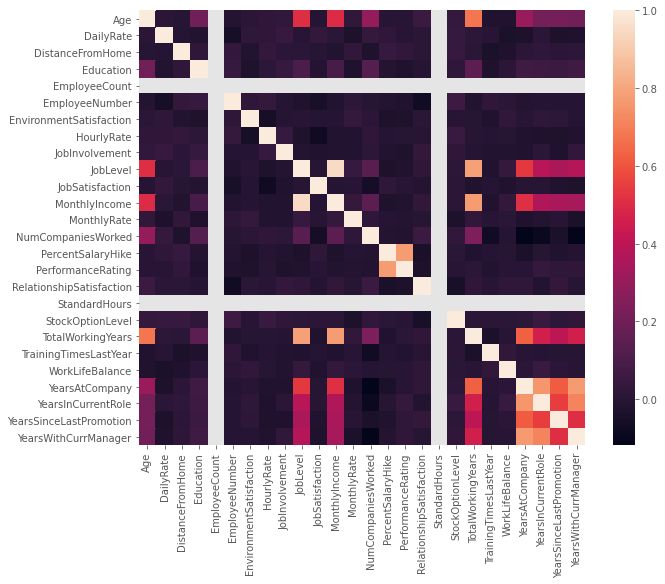

In [24]:
#Create heat map to see correlated features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

# FEATURES SELECTION

In [25]:
#Look for variables with low variances
df.var(axis=0)

Age                         8.345505e+01
DailyRate                   1.628196e+05
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EmployeeCount               0.000000e+00
EmployeeNumber              3.624333e+05
EnvironmentSatisfaction     1.194829e+00
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobLevel                    1.225316e+00
JobSatisfaction             1.216270e+00
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StandardHours               0.000000e+00
StockOptionLevel            7.260346e-01
TotalWorkingYears           6.054056e+01
TrainingTimesLastYear       1.662219e+00
WorkLifeBalance             4.991081e-01
YearsAtCompany              3.753431e+01
YearsInCurrentRole          1.312712e+01
YearsSinceLastPr

From the graphics above, we can already delete some columns that are usesless.
* Employee count
* Employee number
* StandardHours
* Over 18
* Perfomance rating
* Stock Option level
* Job Involvement


# Prepare the data

In the next section, we will delete a few number of rows with low variance and then split the data into categorical and numerical features.
The purpose of this step is to Encode and Scale the features. Finaly we transform everything back to a dataframe.

In [27]:
#Drop the features with low variance
to_drop = ['StandardHours','EmployeeCount','EmployeeNumber','Over18','PerformanceRating','StockOptionLevel','JobInvolvement']
df.drop(to_drop,axis=1,inplace=True)

In [28]:
#Split X and y 
X= df.drop('Attrition',axis=1)
y=df['Attrition'].replace({'Yes':1,'No':0})

#split categorical , numerical and ordinal features
categorical = list(X.columns[X.dtypes=='object'])
ordinal = ['Education','EnvironmentSatisfaction','JobLevel','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction']
numerical = list(X.drop(categorical + ordinal,axis=1))

#Transform numerical and categorical features
X_cat = pd.get_dummies(X[categorical]) #Transform categorical into 0 and 1
X_num = StandardScaler().fit_transform(X[numerical])
X_num = pd.DataFrame(X_num,columns=X[numerical].columns) #Transform the array back to a dataframe for future use

#Create the new X object and look at it
X_new = pd.concat([X_num,X_cat],axis=1)
X_new

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,...,0,0,0,1,0,0,0,1,0,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,...,0,0,1,0,0,0,1,0,1,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,...,0,0,0,0,0,0,0,1,0,1
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,...,0,0,1,0,0,0,1,0,0,1
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-1.224807,-0.835451,-0.284329,0.523316,0.489376,0.735447,0.155707,...,0,0,0,0,0,0,1,0,1,0
1466,0.227347,-0.469754,-0.393938,-1.175601,0.741140,1.004010,0.523316,-0.057267,-0.293077,1.707500,...,0,0,0,0,0,0,1,0,1,0
1467,-1.086676,-1.605183,-0.640727,1.038693,-0.076690,-1.284418,-0.678049,1.309341,-0.678774,-2.171982,...,1,0,0,0,0,0,1,0,0,1
1468,1.322365,0.546677,-0.887515,-0.142264,-0.236474,-0.150393,-0.277594,-0.330589,0.735447,0.155707,...,0,0,0,1,0,0,1,0,1,0


So far so good, everything has been transform with no problem. We now have 42 features.
I only scale the reel numerical features. Those in the ordinal features have a rank among them. So it shouldn't be a problem for the model to compare these variables.

## Split the data in train and test set

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X_new,y,test_size=0.40,shuffle=True)

print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

#I decided to put the test_size at 40% because the dataset have very few observation.

X_train shape (882, 42)
X_test shape (588, 42)
y_train shape (882,)
y_test shape (588,)


## Dimensionality reduction using PCA

In [31]:
# PCA to reduce the dimension and plot the graph
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>0.95)+1

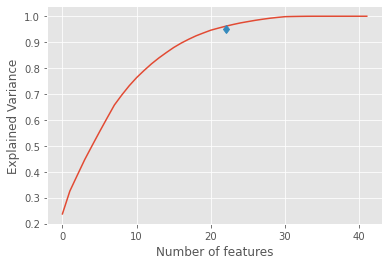

In [32]:
#Plot the variance curve against the number of features
plt.plot(cumsum)
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.plot(d,0.95,marker='d')

In [33]:
#check the number of features to keept
d

22

This section of code extracted the number of features that keeps 95% variance. In other words, 22 features could predict 95% of the attrition prediction. Although PCA algorithm normaly change the features and comprese those with high correlation together. I used it to simply show me how many feature I should keep. The next lines of code will use a SelectKBest model to choos 22 features among the 42 that are the best.

In [71]:
k=21
#Changing the Train set
selector = SelectKBest(f_classif,k=k)
selector.fit(X_train,y_train)

# Keep only the selected features into a new variable X_train_reduced
col=selector.get_support(indices=True)
X_train_reduced = X_train.iloc[:,col]

#Changing the Test set
selector.fit(X_test,y_test)

#Same as above
col=selector.get_support(indices=True)
X_test_reduced = X_test.iloc[:,col]

In [72]:
#Quick look at the new data
X_train_reduced

,Age,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,...,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1223,1.103362,1.366890,1.724681,1.763972,2.611150,0.212802,1.647603,1,0,1,...,0,0,0,0,0,0,1,0,1,0
16,-0.539166,-0.680979,-1.078504,-0.550208,-0.164613,-0.615492,0.245834,0,1,0,...,0,0,0,0,0,1,0,0,0,1
368,0.336849,-0.026120,-0.277594,-0.421642,-0.164613,-0.063296,-1.155935,0,0,1,...,0,0,0,0,0,0,1,0,0,1
40,-0.210661,-0.967188,-0.678049,-1.321601,-0.981014,-1.167687,-1.155935,0,1,0,...,0,1,0,0,0,1,0,0,1,0
926,0.665354,0.792135,0.122861,1.506840,2.284590,0.764998,3.610079,0,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,1.650871,2.834905,-0.678049,2.792496,4.080672,2.697683,1.367249,0,0,1,...,0,0,0,0,0,0,1,0,1,0
581,-0.758170,-0.567303,0.122861,-0.550208,-0.817734,-0.615492,-0.595227,0,1,0,...,0,1,0,0,0,0,1,0,1,0
304,0.227347,0.660823,-1.078504,0.992578,1.794749,1.593291,0.806541,0,1,0,...,1,0,0,0,0,1,0,0,1,0
170,-1.086676,-0.731974,-1.078504,-0.678774,-0.327893,-0.615492,-0.875581,0,1,0,...,0,0,0,0,0,0,1,0,0,1


## Random Forest Classifier

In [86]:
#Create fit and score the model
rfc = RandomForestClassifier(n_estimators=700,max_depth=10,n_jobs=-1,random_state=123)
rfc_model = rfc.fit(X_train_reduced,y_train)

rfc_scores = cross_val_score(rfc,X_train_reduced,y_train,scoring='accuracy',cv=5)
print('This is train score',rfc_scores.mean())

This is train score 0.8582691319979455


In [87]:
#Predict the model
y_pred_rfc = rfc_model.predict(X_test_reduced)
print('This is test score: ',accuracy_score(y_pred_rfc,y_test))

#Print the confusion_matrix
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred_rfc))

This is test score:  0.8452380952380952
Confusion matrix:
[[483   6]
 [ 85  14]]


In [88]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       489
           1       0.70      0.14      0.24        99

    accuracy                           0.85       588
   macro avg       0.78      0.56      0.57       588
weighted avg       0.83      0.85      0.80       588



Sadly, my model have accuracy of 85 which is pretty close to the null model. I am still happy with the precision score of it. I few things could still be done to enhance the model performance. 
* First the target feature is imbalance and a SMOTE algorithm could fix that problem. 
* Get more data because 1470 observation is pretty small.
* Remove Outlier from the dataset.

# Features Importance

In this section we will finaly find wich features are responsible for attrition, rank by importance.

## Plot the importance of each column in attrition rate

In [89]:
# Create model that 
def plot_feature_importance(importance,names,model_type): 
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data) 
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True) 
    
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

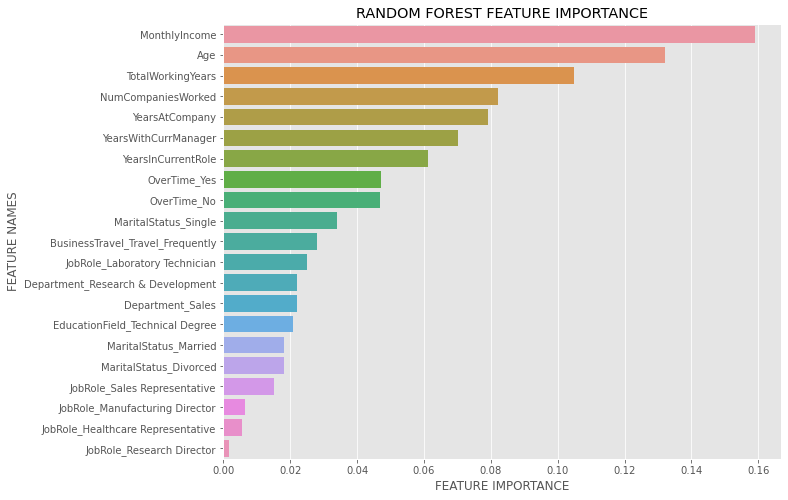

In [90]:
plot_feature_importance(rfc.feature_importances_,X_train_reduced.columns,'RANDOM FOREST')

# CONCLUSION

#### From the features importance graph above, the companie would be able to dig deeper into the most relevent features or attributes related to attrition among their employee. Starting probably with the top 5 causes.



Please upvote if find this kernel usefull. Feel free to comment my code if you thing something could have been done differently.

Thank you.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv
